In [4]:
import tensorflow as tf

In [5]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [7]:
print(tf.__version__)

1.13.1


In [8]:
fashion_mnist=keras.datasets.fashion_mnist

In [9]:
import os
print(os.getcwd())

C:\Users\krishnakakade\image classification in python


In [10]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [11]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Ankle boot','Bag']

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
len(train_labels)

60000

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
len(train_labels)

60000

In [16]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

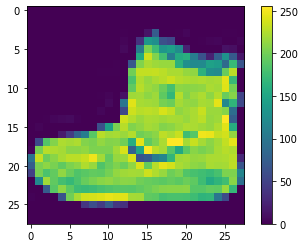

In [17]:
#### now we have to preprocess this data so now we are try to load an image krishna's writes
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
train_images=train_images/255.0
test_images=test_images/255.0

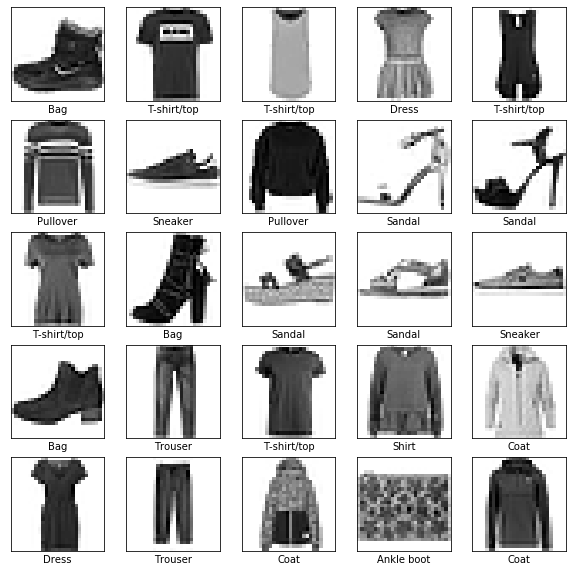

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)#for unshowing the grid lines in the images 
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
# where are displaying classes name below

In [28]:
# now we have to set layers the basic represention of neural network is layer
# relu is rectfied linear network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.
